<a href="https://colab.research.google.com/github/seongjiko/Dacon_codeList/blob/main/%EC%A0%84%EA%B5%AD%20SW%EC%A4%91%EC%8B%AC%EB%8C%80%ED%95%99%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%98%88%EC%84%A0_0_90278.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# SW중심대학 공동 AI 경진대회

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np

# 데이터 불러오기

In [3]:
pd.set_option('display.max_columns', None) # 모든 컬럼 생략없이 출력

In [4]:
train = pd.read_csv("/content/drive/MyDrive/dacon/SW_competition/train.csv")
train = train.drop(['index', 'country'], axis=1) # index 컬럼 삭제 무의미한 데이터

test = pd.read_csv("/content/drive/MyDrive/dacon/SW_competition/test.csv")
test = test.drop(['index', 'country'], axis=1)

# 데이터 확인

train셋 확인

In [5]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

## 결측치 확인

In [7]:
train.isna().sum()

Q1             41
Q2             69
Q3             50
Q4             71
Q5             38
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 68, dtype: int64

## 특징 공학 --> country(나라) 별 대륙 컬럼 저장

In [8]:
# ##
# train['country'].unique()
# continent = {
#     'USA': 'NA',
#     'GBR': 'EU',
#     'CAN': 'NA',
#     'AUS': 'OC',
#     'DEU': 'EU',
#     'PHL': 'AS',
#     'BRA': 'SA',
#     'IND': 'AS',
#     'POL': 'EU',
#     'FRA': 'EU',
#     'ITA': 'EU',
#     'NLD': 'EU',
#     'SWE': 'EU', 
#     'MEX': 'NA',
#     'FIN': 'EU',
#     'NZL': 'OC',
#     'MYS': 'AS',
#     'IDN': 'AS',
#     'NOR': 'EU',
#     'SGP': 'AS',
#     'ESP': 'EU',
#     'DNK': 'EU',
#     'ROU': 'EU',
#     'IRL': 'EU',
#     'ARG': 'SA',
#     'PRT': 'EU',
#     'TUR': 'EU',
#     'RUS': 'EU',
#     'CZE': 'EU',
#     'HUN': 'EU',
#     'BEL': 'EU', 
#     'GRC': 'EU',
#     'ZAF': 'AF',
#     'CHL': 'SA',
#     'AUT': 'EU',
#     'CHE': 'EU',
#     'ISR': 'AS',
#     'SRB': 'EU',
#     'HRV': 'EU',
#     'JPN': 'AS',
#     'HKG': 'AS',
#     'THA': 'AS',
#     'BGR': 'EU',
#     'ARE': 'AS',
#     'PAK': 'AS',
#     'UKR': 'EU',
#     'KOR': 'AS',
#     'SVN': 'EU',
#     'LVA': 'EU',
#     'LTU': 'EU',
#     'SVK': 'EU',
#     'VEN': 'SA',
#     'COL': 'SA',
#     'PER': 'SA',
#     'KEN': 'AF',
#     'PRI': 'SA',
#     'URY': 'SA',
#     'CRI': 'SA',
#     'VNM': 'AS',
#     'EST': 'EU',
#     'SAU': 'AS',
#     'BIH': 'EU',
#     'TWN': 'AS',
#     'IRN': 'AS',
#     'JOR': 'AS',
#     'EGY': 'AS',
#     'KWT': 'AS',
#     'HND': 'NA',
#     'NGA': 'AF',
#     'ALB': 'AF',
#     'CHN': 'AS',
#     'QAT': 'AS',
#     'ISL': 'EU',
#     'TTO': 'NA',
#     'JAM': 'NA',
#     'DOM': 'NA',
#     'MKD': 'EU',
#     'BGD': 'AS',
#     'GHA': 'AF',
#     'GEO': 'AS',
#     'ECU': 'SA',
#     'GUM': 'OC',
#     'BHS': 'NA',
#     'BHR': 'AS',
#     'CYP': 'OC',
#     'FJI': 'OC',
#     'LUX': 'AS',
#     'BRN': 'AS',
#     'MAR': 'NA',
#     'OMN': 'AS',
#     'SDN': 'AF',
#     'LBN': 'AS',
#     'DZA': 'AF',
#     'TUN': 'AF',
#     'NPL': 'AS',
#     'SLV': 'NA',
#     'AZE': 'AS',
#     'PRY': 'SA',
#     'MLT': 'EU',
#     'SSD': 'AF',
#     'CUW': 'SA',
#     'FSM': 'OC',
#     'BWA': 'AF',
#     'ARM': 'AS',
#     'MOZ': 'SA',
#     'ZMB': 'SA',
#     'FRO': 'EU',
#     'NAM': 'SA',
#     'PAN': 'NA',
#     'VIR': 'NA',
#     'MUS': 'AF',
#     'BRB': 'NA',
#     'AFG': 'AS',
#     'MWI': 'AF',
#     'BLR': 'EU',
#     'MAC': 'AS',
#     'KHM': 'AS',
#     'LBY': 'AF',
#     'LAO': 'AS',
#     'MNP': 'OC',
#     'MDG': 'AF',
#     'KAZ': 'AS',
#     'SYR': 'AS',
#     'MDV': 'AS',
#     'MNG': 'AS',
#     'UGA': 'AF',
#     'AGO': 'AF',
#     'GRL': 'EU',
#     'GUY': 'AF',
#     'IRQ': 'AS',
#     'PNG': 'OC',
#     'RWA': 'AF',
#     'ALA': 'EU',
#     'GTM': 'NA',
#     'VGB': 'NA',
#     'GUF': 'SA',
#     'ETH': 'AF',
#     np.nan: np.nan
# }
# ##

In [9]:
# for i in range(train.shape[0]):
#     country = train.loc[i, 'country']
#     train.loc[i, 'continent'] = continent[country]

#     country = test.loc[i, 'country']
#     test.loc[i, 'continent'] = continent[country]

In [10]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## 라벨 인코딩

In [11]:
encoder = LabelEncoder()
# encoder.fit(train['country'])
# train['country'] = encoder.transform(train['country'])
# encoder.fit(train['continent'])
# train['continent'] = encoder.transform(train['continent'])
train = train.astype('float64')
test = test.astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

## 데이터 전처리 전 시각화

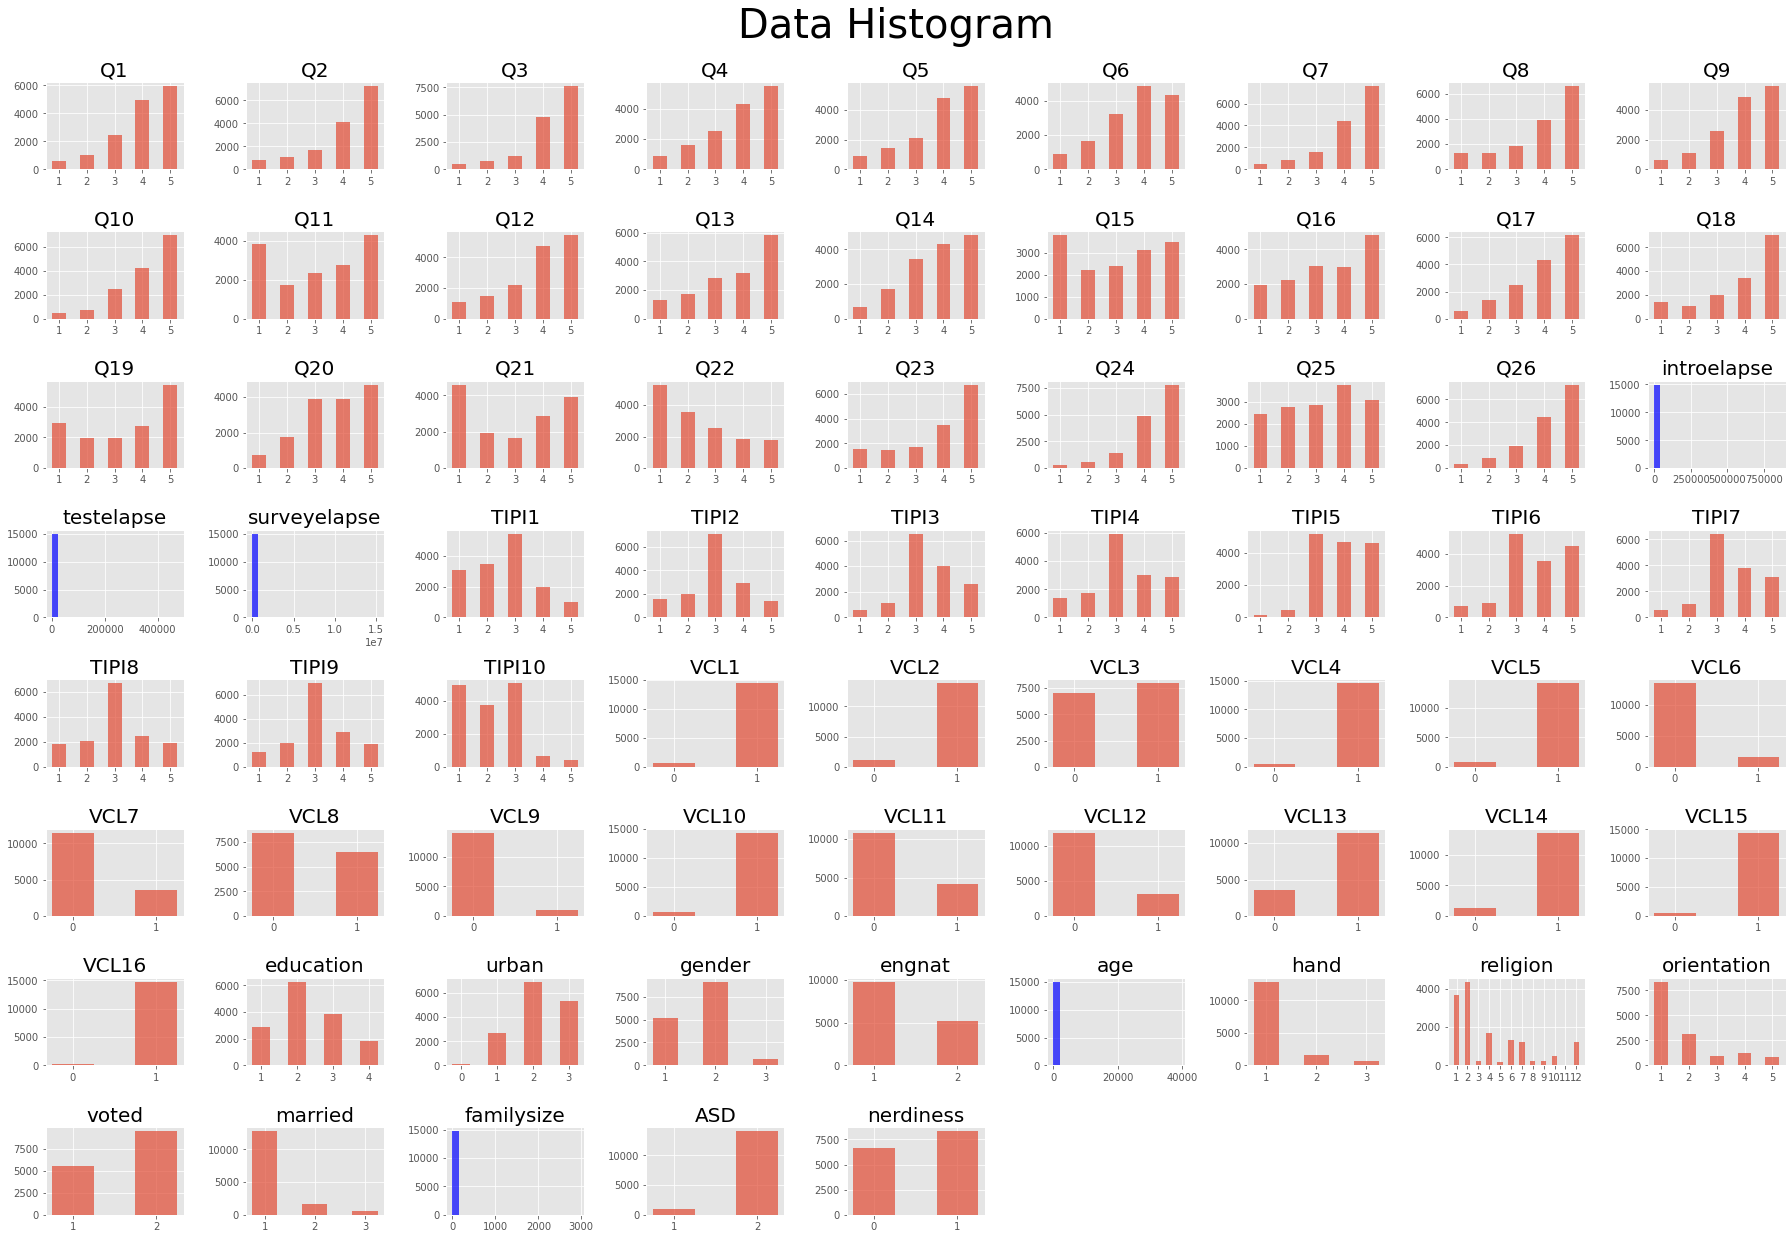

In [12]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)

# id는 제외하고 시각화
cols = train.columns
for i in range(len(cols)):
    plt.subplot(9, 9, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 이상치 & 결측치 평균값 대체

## 이상치 확인

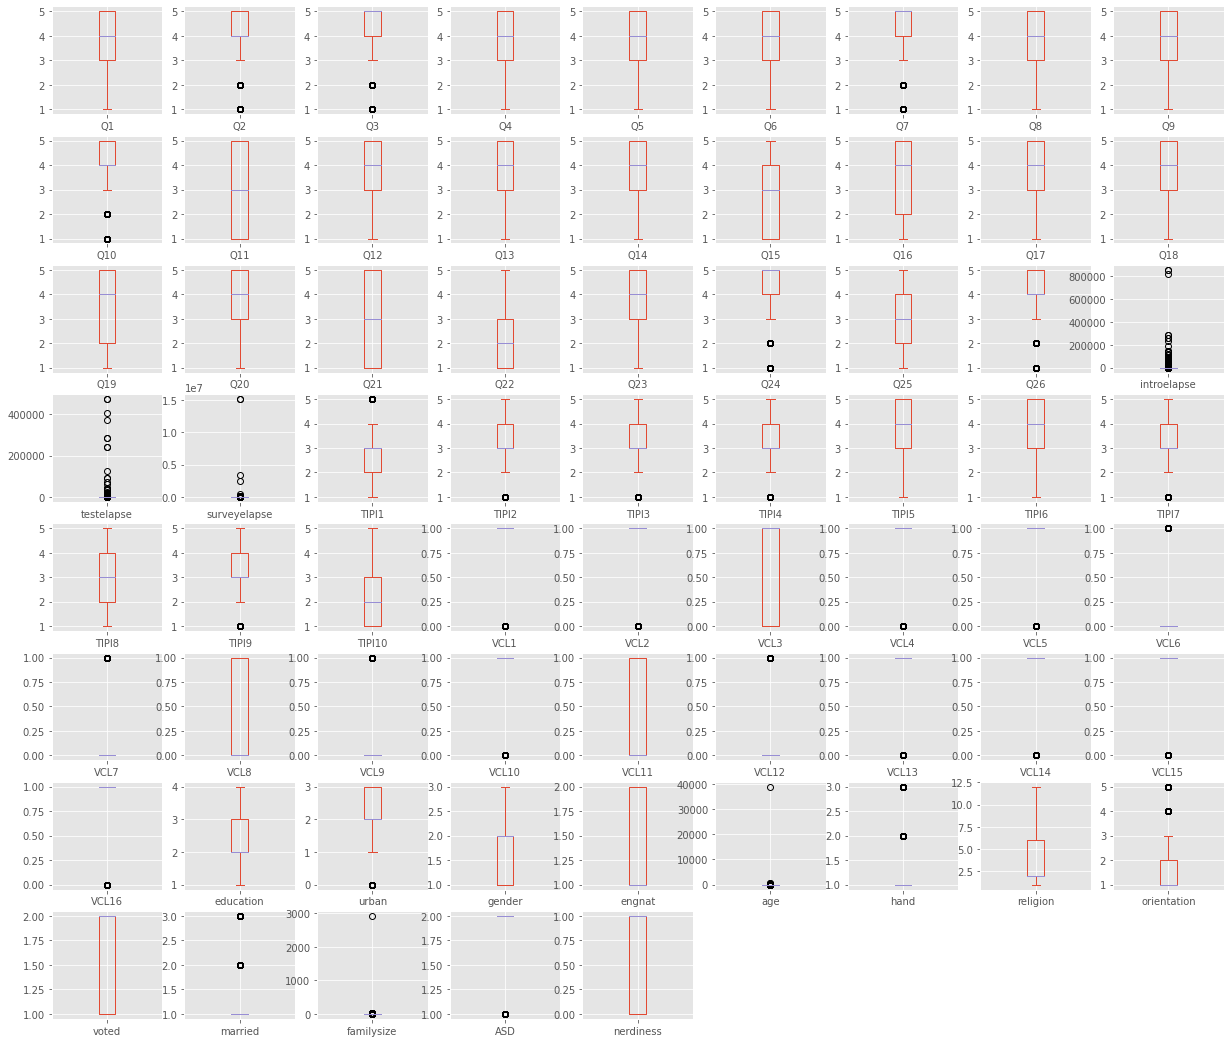

In [13]:
train.plot(kind='box', subplots=True, layout=(9, 9), figsize=(21, 21))
plt.show()       

## 이상치 처리

In [14]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    # 넘파이의 값을 퍼센트로 표시해주는 함수

    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [15]:
introelapse_index_data = outliers_iqr(train['introelapse'])[0]
testelapse_index_data = outliers_iqr(train['testelapse'])[0]
surveyelapse_index_data = outliers_iqr(train['surveyelapse'])[0]
age_index_data = outliers_iqr(train['age'])[0]

In [16]:
train.loc[train['familysize'] > 5, 'familysize'] = np.nan # 6명 이상의 가족 수 == 이상치 처리, 왠지모르겠는데 위의 함수로 처리가 안됨.
train['familysize'].value_counts()

2.0    6303
3.0    3573
1.0    2373
4.0    1445
5.0     535
Name: familysize, dtype: int64

In [17]:
train.loc[introelapse_index_data, 'introelapse'] = np.nan
train.loc[testelapse_index_data, 'testelapse'] = np.nan
train.loc[surveyelapse_index_data, 'surveyelapse'] = np.nan
train.loc[age_index_data, 'age'] = np.nan

In [18]:
introelapse_index_data = outliers_iqr(test['introelapse'])[0]
testelapse_index_data = outliers_iqr(test['testelapse'])[0]
surveyelapse_index_data = outliers_iqr(test['surveyelapse'])[0]
age_index_data = outliers_iqr(test['age'])[0]
test.loc[test['familysize'] > 5, 'familysize'] = np.nan # 6명 이상의 가족 수 == 이상치 처리, 왠지모르겠는데 위의 함수로 처리가 안됨.
test['familysize'].value_counts()

test.loc[introelapse_index_data, 'introelapse'] = np.nan
test.loc[testelapse_index_data, 'testelapse'] = np.nan
test.loc[surveyelapse_index_data, 'surveyelapse'] = np.nan
test.loc[age_index_data, 'age'] = np.nan

In [25]:
from sklearn.impute import SimpleImputer
fill=SimpleImputer(missing_values=np.nan , strategy='mean')
train = pd.DataFrame(fill.fit_transform(train), columns = train.columns)
test = pd.DataFrame(fill.fit_transform(test), columns = test.columns)

## 데이터 보간(datawig)

In [ ]:
# train.dropna()

In [ ]:
pd.set_option('display.max_rows', None)
print(train.isna().sum())
pd.set_option('display.max_rows', 10)

In [ ]:
train.corr()

In [ ]:
train.plot(kind='box', subplots=True, layout=(9, 9), figsize=(21, 21))
plt.show()       

In [ ]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 10)

# id는 제외하고 시각화
cols = train.columns
for i in range(len(cols)):
    plt.subplot(9, 9, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(f'{cols[i]} skew: {train[cols[i]].skew():0.2f}', fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 모델 탐색

In [26]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics

In [46]:
from sklearn.model_selection import StratifiedKFold

def kfold(model, train, scale = False):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['nerdiness']):
        
        train_cv = train.iloc[t] # 훈련용
        val_cv = train.iloc[v] # 검증용 분리

        train_X = train_cv.drop('nerdiness', axis=1)
        train_y = train_cv['nerdiness']

        val_X = val_cv.drop('nerdiness', axis=1)
        val_y = val_cv['nerdiness']
            
        model.fit(train_X, train_y)

        fpr, tpr, thresholds = metrics.roc_curve(val_y, model.predict_proba(val_X)[:, 1])

        score = metrics.auc(fpr, tpr)
        
        cv_accuracy.append(score)
        n_iter += 1
    return np.mean(cv_accuracy)

In [48]:
models = [
    #KNeighborsClassifier(),
    #LogisticRegression(),
    #DecisionTreeClassifier(),
    RandomForestClassifier(),
    #GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(silent=True),
    ExtraTreesClassifier()
]

for model in models:
    print(f'{type(model).__name__} score: {kfold(model, train)}')

RandomForestClassifier score: 0.8727324770611015
XGBClassifier score: 0.8054870085674937
LGBMClassifier score: 0.8256406948058743
CatBoostClassifier score: 0.8365992208927956
ExtraTreesClassifier score: 0.8756150473868992


# 파이캐럿 사용

In [31]:
!pip install --pre pycaret

     |████████████████████████████████| 79.9 MB 1.3 MB/s 
     |████████████████████████████████| 134 kB 59.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 3.3 MB 46.6 MB/s 
     |████████████████████████████████| 281 kB 56.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 9.8 MB 34.9 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 106 kB 59.3 MB/s 
     |████████████████████████████████| 6.7 MB 49.1 MB/s 
     |████████████████████████████████| 11.2 MB 38.1 MB/s 
     |████████████████████████████████| 944 kB 59.7 MB/s 
     |████████████████████████████████| 34.5 MB 5.1 kB/s 
     |█████

In [32]:
from pycaret.classification import *
import jinja2
# pip install markupsafe==2.0.1 # 진자 오류시 다음과 같은 설치
setup_ = setup(data = train,             # 학습 데이터 
               target = 'nerdiness',  # 학습 데이터 중 예측해야 하는 값. (Train_test_spli을 하지 않아도 됨)
               # ignore_features = ["index", "country"],
               session_id=42,            # random_state 값 고정 88888
               n_jobs = -1,              # 성능을 최대로 내기 위해 -1 사용.
               train_size = 0.9)        # Train - test 비율을 1:1로 나눔)
              #  numerical_features = ["contract_until"])
               # silent =True)             # 이거 True로 두면 Enter 안누르고 진행 가능

# setup에서 feature의 type을 잘못 적었을 때 : numerical_features[변수명] 혹은 categorical_feautres[변수명]

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 2031
INFO:logs:self.variable_keys: {'seed', '_all_metrics', '_is_multiclass', 'X', 'n_jobs_param', 'exp_id', '_available_plots', '_all_models_internal', 'X_train', 'memory', 'fold_shuffle_param', '_all_models', 'fold_groups_param', '_ml_usecase', 'X_test', 'master_model_container', 'display_container', 'variable_keys', '

,Description,Value
0,Session id,42
1,Target,nerdiness
2,Target type,Binary
3,Original data shape,"(15000, 68)"
4,Transformed data shape,"(15000, 68)"
5,Transformed train set shape,"(13500, 68)"
6,Transformed test set shape,"(1500, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:setup() successfully completed in 3.0s...............


In [33]:
top3 = compare_models(sort = "AUC", n_select=2)

INFO:logs:create_model() successfully completed......................................


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7859,0.8773,0.8377,0.7888,0.8124,0.5635,0.5651,1.8270
rf,Random Forest Classifier,0.7871,0.8733,0.8418,0.7882,0.8140,0.5657,0.5677,2.4660
catboost,CatBoost Classifier,0.7654,0.8371,0.8246,0.7687,0.7955,0.5212,0.5232,12.1030
gbc,Gradient Boosting Classifier,0.7350,0.8061,0.7979,0.7427,0.7692,0.4589,0.4608,3.1330
lda,Linear Discriminant Analysis,0.7258,0.7961,0.8046,0.7285,0.7646,0.4381,0.4415,0.2170
lr,Logistic Regression,0.7243,0.7939,0.7942,0.7310,0.7612,0.4364,0.4387,3.5150
ada,Ada Boost Classifier,0.7258,0.7932,0.7800,0.7392,0.7589,0.4415,0.4426,0.8430
nb,Naive Bayes,0.6850,0.7445,0.7610,0.6974,0.7278,0.3556,0.3577,0.0930
qda,Quadratic Discriminant Analysis,0.6691,0.7271,0.7591,0.6803,0.7175,0.3211,0.3239,0.1500
dt,Decision Tree Classifier,0.7190,0.7150,0.7518,0.7435,0.7476,0.4306,0.4307,0.2440


INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
            

In [34]:
blender_top3 = stack_models(estimator_list=top3,optimize='AUC')

INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe


INFO:logs:Finalizing model
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                             

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7904,0.8861,0.8249,0.8023,0.8134,0.5743,0.5746
1,0.7881,0.8873,0.8289,0.7969,0.8126,0.5692,0.5698
2,0.7822,0.8790,0.8195,0.7940,0.8066,0.5576,0.5579
3,0.7948,0.8836,0.8514,0.7930,0.8212,0.5812,0.5832
4,0.7807,0.8714,0.8420,0.7794,0.8095,0.5521,0.5544
5,0.7733,0.8657,0.8099,0.7867,0.7982,0.5398,0.5401
6,0.7926,0.8776,0.8286,0.8029,0.8155,0.5788,0.5792
7,0.7985,0.8915,0.8246,0.8137,0.8191,0.5917,0.5918
8,0.7904,0.8828,0.8407,0.7929,0.8161,0.5728,0.5742


INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                           

In [35]:
final_model = finalize_model(blender_top3)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efcf1ea44d0>, estimator=StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                   

In [36]:
prediction = final_model.predict_proba(test)

In [37]:
prediction = prediction[:, 1]


In [38]:
prediction

array([0.01469996, 0.89084912, 0.93380572, ..., 0.96262788, 0.01178973,
       0.75862174])

In [39]:
submission = pd.read_csv('/content/drive/MyDrive/dacon/SW_competition/sample_submission.csv')
submission['nerdiness'] = prediction
submission

,index,nerdiness
0,0,0.014700
1,1,0.890849
2,2,0.933806
3,3,0.530616
4,4,0.964933
...,...,...
35447,35447,0.968593
35448,35448,0.782305
35449,35449,0.962628
35450,35450,0.011790


In [40]:
submission.to_csv("submission_08_03.csv", index = False)

In [41]:
train.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
Q1,1.000000,0.178144,0.383643,0.575161,0.223056,0.165382,0.106921,0.324251,0.169911,0.226342,...,0.002717,-0.101061,0.025708,-0.004032,0.149580,0.080737,-0.138641,-0.046904,-0.119225,0.287430
Q2,0.178144,1.000000,0.144038,0.188233,0.168691,0.148645,0.342293,0.243084,0.194377,0.145980,...,0.004053,0.002845,0.041943,-0.030412,0.065911,-0.018386,-0.026192,-0.012144,-0.036801,0.264142
Q3,0.383643,0.144038,1.000000,0.330806,0.145930,0.185443,0.078970,0.346154,0.088288,0.300520,...,-0.012583,-0.106620,0.010678,-0.036343,0.151527,0.063730,-0.125150,-0.017528,-0.093905,0.207147
Q4,0.575161,0.188233,0.330806,1.000000,0.266505,0.212916,0.130414,0.264938,0.209041,0.242140,...,-0.074609,-0.050749,0.045857,-0.023592,0.176769,0.027418,-0.077192,-0.013489,-0.169033,0.267237
Q5,0.223056,0.168691,0.145930,0.266505,1.000000,0.305178,0.311620,0.120310,0.428825,0.275941,...,0.025163,0.069562,0.048088,-0.041868,0.027149,-0.047910,0.059428,-0.005745,-0.079039,0.236315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
voted,0.080737,-0.018386,0.063730,0.027418,-0.047910,-0.048460,-0.037439,0.083685,-0.028523,-0.036532,...,0.058701,-0.366092,0.005318,0.013878,0.056463,1.000000,-0.195428,-0.011829,-0.010075,-0.013146
married,-0.138641,-0.026192,-0.125150,-0.077192,0.059428,0.049665,0.067954,-0.121868,0.051379,0.007145,...,-0.121066,0.370511,0.000603,0.044762,-0.152676,-0.195428,1.000000,0.088959,0.041206,-0.025503
familysize,-0.046904,-0.012144,-0.017528,-0.013489,-0.005745,0.006807,0.001506,-0.021531,0.008527,-0.022051,...,-0.107830,0.010074,-0.005869,0.068259,-0.032024,-0.011829,0.088959,1.000000,0.013457,-0.025099
ASD,-0.119225,-0.036801,-0.093905,-0.169033,-0.079039,-0.039303,-0.024011,-0.052921,-0.035268,-0.051332,...,0.043014,0.033034,-0.040363,-0.012697,-0.091548,-0.010075,0.041206,0.013457,1.000000,-0.056458
